<a href="https://colab.research.google.com/github/anilpak987/IPL_Score_Prediction/blob/master/IPL_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Libraries
import time
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
#creating dataframe
ipl_data=pd.read_csv('/content/drive/My Drive/ipl.csv')
print(ipl_data.shape)
ipl_data.head()

(76014, 15)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
#Check for duplicates and remove if present.
ipl_data=ipl_data.drop_duplicates()

#count of missing values in the dataset
print("Num of missing values in the dataset is:",ipl_data.isnull().sum().sum())

print(ipl_data.shape)
#ipl_data.head()

Num of missing values in the dataset is: 0
(76014, 15)


In [8]:
#Dropping unnecessary columns
ipl_data=ipl_data.drop(['mid','date','striker','non-striker'],axis=1)
print(ipl_data.shape)
ipl_data.head()

(76014, 11)


,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,222


In [9]:
#creating a dictionary of batsman and bowler.
batsman=list(set(ipl_data['batsman'].to_list()))
bowler=list(set(ipl_data['bowler'].to_list()))

batsman.extend(bowler)
batsman_bowler=list(set(batsman))
batsman_bowler.sort()

batsman_bowler_ind=[i for i in range(len(batsman_bowler))]
batsman_bowler_dict=dict(zip(batsman_bowler,batsman_bowler_ind))

#creating a dictionary of bat_team and bowl_team.
bat_team=list(set(ipl_data['bat_team'].to_list()))
bowl_team=list(set(ipl_data['bowl_team'].to_list()))

bat_team.extend(bowl_team)
bat_bowl_team=list(set(bat_team))
bat_bowl_team.sort()

bat_bowl_team_ind=[i for i in range(len(bat_bowl_team))]
bat_bowl_team_dict=dict(zip(bat_bowl_team,bat_bowl_team_ind))

#creating a dictionary of venue.
venue=list(set(ipl_data['venue'].to_list()))
venue.sort()

venue_ind=[i for i in range(len(venue))]

venue_dict=dict(zip(venue,venue_ind))

In [10]:
import pickle
with open("dict.pickle", "wb") as f:
    pickle.dump((batsman_bowler_dict,bat_bowl_team_dict,venue_dict), f)

#with open("dict.pickle", "rb") as f:
    #a,b = pickle.load(f) 

In [10]:
#replacing name with the index
batsman_ind=[]
bowler_ind=[]
for i in ipl_data['batsman'].to_list():
  batsman_ind.append(batsman_bowler_dict[i])
for i in ipl_data['bowler'].to_list():
  bowler_ind.append(batsman_bowler_dict[i])


bat_team_ind=[]
bowl_team_ind=[]
for i in ipl_data['bat_team'].to_list():
  bat_team_ind.append(bat_bowl_team_dict[i])
for i in ipl_data['bowl_team'].to_list():
  bowl_team_ind.append(bat_bowl_team_dict[i])


match_venue_ind=[]
for i in ipl_data['venue'].to_list():
  match_venue_ind.append(venue_dict[i])


In [11]:
#replacing the text columns like ['batsman','bowler','bat_team','bowl_team','venue'] with indexs.
ipl_data=ipl_data.drop(['batsman','bowler','bat_team','bowl_team','venue'],axis=1)
ipl_data['venue']=match_venue_ind
ipl_data['bat_team']=bat_team_ind
ipl_data['bowl_team']=bowl_team_ind
ipl_data['batsman']=batsman_ind
ipl_data['bowler']=bowler_ind
print(ipl_data.shape)
ipl_data.head()

(76014, 11)


,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue,bat_team,bowl_team,batsman,bowler
0,1,0,0.1,1,0,222,14,6,12,382,295
1,1,0,0.2,1,0,222,14,6,12,69,295
2,2,0,0.2,2,0,222,14,6,12,69,295
3,2,0,0.3,2,0,222,14,6,12,69,295
4,2,0,0.4,2,0,222,14,6,12,69,295


In [ ]:
#one hot encoding using pd.get_dummies
#ipl_data_final=pd.get_dummies(ipl_data,drop_first=True)
#print(ipl_data_final.shape)
#ipl_data_final.head()

In [12]:
#seperating the target variable
X=ipl_data.drop('total',axis=1)
Y=ipl_data['total']
print(X.shape)
print(Y.shape)

(76014, 10)
(76014,)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(57010, 10) (57010,)
(19004, 10) (19004,)


In [ ]:
params={'n_estimators':[int(i) for i in np.linspace(100,2000,15)],
        'max_depth':[int(i) for i in np.linspace(3,100,15)],
        'min_samples_split':[1,2,5,10],
        'min_samples_leaf':[1,2,5,10],
        'max_features':['auto', 'sqrt', 'log2']

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,max_depth=30,n_jobs=-1,verbose=1)
rf.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.7min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [16]:
import pickle
pickle.dump((rf),open('rf.pkl','wb')) #for dump

In [146]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   12.2s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   17.6s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:   19.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    6.6s
[Parallel(n_jobs=2)]: Done 2000 

In [147]:
from sklearn.metrics import mean_squared_error

mse_train=mean_squared_error(Y_train,y_train_pred)
mse_test=mean_squared_error(Y_test,y_test_pred)
print(mse_train)
print(mse_test)

7.309974637006519
55.571609196713844


In [144]:
from sklearn.metrics import mean_squared_error

mse_train=mean_squared_error(Y_train,y_train_pred)
mse_test=mean_squared_error(Y_test,y_test_pred)
print(mse_train)
print(mse_test)

7.36317290865784
55.65935094715478


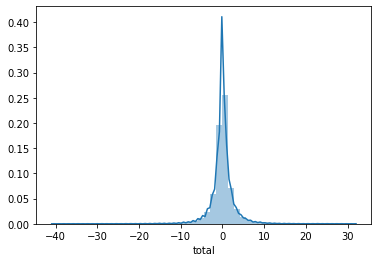

In [140]:
sns.distplot(Y_train-y_train_pred)

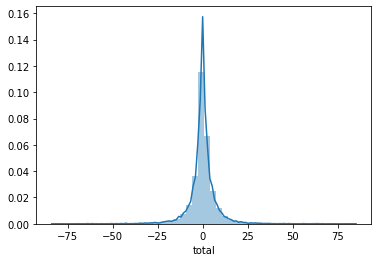

In [141]:
sns.distplot(Y_test-y_test_pred)

In [ ]:
#training the model using random forest regressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

params={'n_estimators':[int(i) for i in np.linspace(100,2000,10)],
        'max_depth':[int(i) for i in np.linspace(3,50,10)]
}

rf=RandomForestRegressor()
rand_rf=RandomizedSearchCV(rf,params,n_jobs=-1,cv=3,verbose=1)
rand_rf.fit(X_train,Y_train)
print(rand_rf.best_params_)

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500],
 'max_depth': [3, 9, 16, 23, 30, 37, 44, 51, 58, 65, 72, 79, 86, 93, 100],
 'min_samples_split': [1, 2, 5, 10],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [18]:
batsmen_bowlers=list(batsman_bowler_dict.keys())
bat_bowl_team=list(bat_bowl_team_dict.keys())
match_venue=list(venue_dict.keys())

In [41]:
from flask import Flask, render_template, request
import jsonify
import requests
import pickle
import numpy as np
import sklearn
#from sklearn.preprocessing import StandardScaler
app = Flask(__name__)
#model = pickle.load(open('Rand_Forest_Regression_Model.pkl', 'rb'))
@app.route('/',methods=['GET'])
def Home():
    return render_template('blog.html', Venues=match_venue,Bat_Bowl_Teams=bat_bowl_team,Batsmen_Bowlers=batsmen_bowlers)
@app.route("/predict", methods=['POST'])
def predict():
    if request.method == 'POST':
        venue = request.form['venue']
        venue=venue_dict[venue]
        #print(venue)
        bat_team=request.form['bat_team']
        bat_team=bat_bowl_team_dict[bat_team]
        #print(bat_team)
        bowl_team = request.form['bowl_team']
        bowl_team=bat_bowl_team_dict[bowl_team]
        #print(bowl_team)
        batsman=request.form['batsman']
        batsman=batsman_bowler_dict[batsman]
        #print(batsman)
        bowler = request.form['bowler']
        bowler=batsman_bowler_dict[bowler]
        #print(bowler)
        runs = int(request.form['runs'])
        #print(runs)
        wickets=int(request.form['wickets'])
        #print(wickets)
        overs =float(request.form['overs'])
        #print(overs)
        runs_last_5=int(request.form['runs_last_5'])
        #print(runs_last_5)
        wickets_last_5 = int(request.form['wickets_last_5'])
        #print(wickets_last_5)
        output=rf.predict([[runs,wickets,overs,runs_last_5,wickets_last_5,venue,bat_team,bowl_team,batsman,bowler]])
        #print(output)
        return render_template('blog.html',prediction_text="Predicted Score is {}".format(output))
    else:
        return render_template('blog.html')
    
if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [42]:
!git init

Initialized empty Git repository in /content/.git/


In [43]:
!git config — global user.email “You@Your.com”
!git config — global user.name “Username”

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [ ]:
!git add -A

In [32]:
rf.predict([[80,5,9,25,3,3,4,6,85,32]])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished


array([152.055])

In [29]:
[runs,wickets,overs,runs_last_5,wickets_last_5,venue,bat_team,bowl_team,batsman,bowler]

['runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5',
 'venue',
 'bat_team',
 'bowl_team',
 'batsman',
 'bowler']

In [36]:
output

NameError: ignored